# Research of Borrowers Reliability

## Project Description 

The client is the Credit department of the bank. The tasks consist of recognizing whether the marital status and the number of children of the client affect the repayment of the loan on time. Input data from the bank - statistics on the solvency of customers. The study's results will be considered when building a credit scoring model - a particular system that assesses the ability of a potential borrower to repay a loan to a bank.

## Objectives

The objective of this project is to:

Prepare a report for a bank's loan division by analyzing a borrower's risk of defaulting.

Apply Data Preprocessing to a real-life analytical case study.

## 1. Read CSV and import Libraries

In [1]:
import pandas as pd #import Pandas

In [2]:
import seaborn as sns #import Seaborn

In [3]:
import matplotlib.pyplot as plt #import Matplotlib

In [4]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/data.csv')

### 1.1. Return the first 10 rows for the object based on position. 

In [5]:
print(data.head(10))

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   
5         0    -926.185831         27    высшее             0   
6         0   -2879.202052         43    высшее             0   
7         0    -152.779569         50   СРЕДНЕЕ             1   
8         2   -6929.865299         35    ВЫСШЕЕ             0   
9         0   -2188.756445         41   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0    

### 1.2. Calculate the statistical data and get a concise summary of dataframe. 

In [6]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### 1.3. Subsidiary Conclusion

The data set analysis depicts that the columns have different numeric types as integers, float, and objects. Additionally, the result of the previous processing demonstrates the necessity of checking the missing values.

### 1.3.1 Column Descriptions

**children** — the number of children per family

**days_employed** — the entire duration of the career counted by days 

**dob_years** — the age per years 

**education** — customer's educational level

**education_id** — an id of educational level

**family_status** — family status 

**family_status_id** — an id of family status

**gender** — gender 

**income_type** — an income type 

**debt** — a presence of the debt

**total_income** — total income per a year

**purpose** — a purpose of the loan

## 2. Pre-processing of the Data

### 2.1 Removal the missing values 

In [8]:
print(data.isnull().sum())# check Na

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


### 2.2 Correlation research and visialization

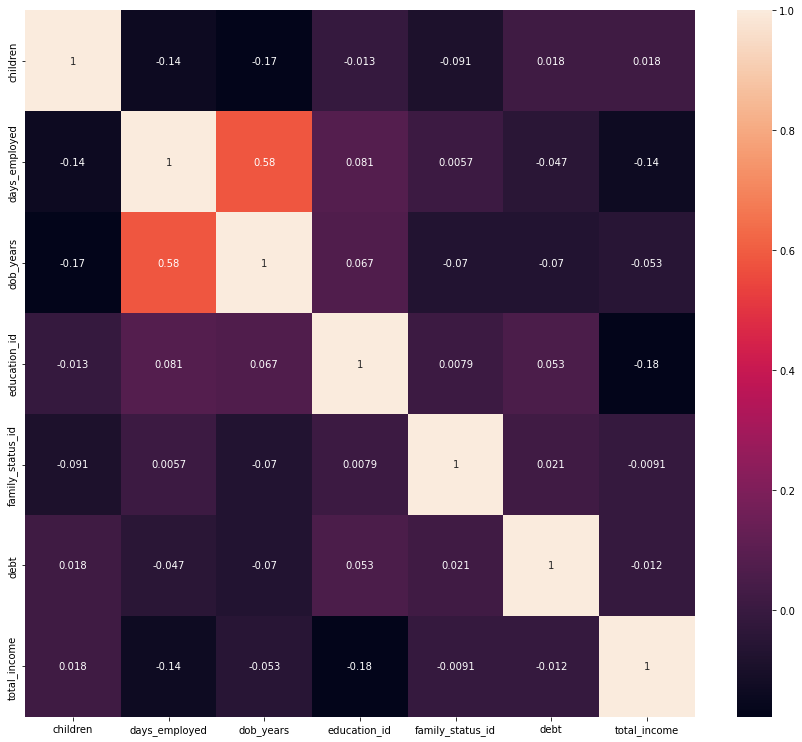

In [9]:
plt.figure(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True);

### 2.2.1 Subsidiary Conclusion

There need to be valued in two columns. One of them is **days_employed**. Another column with missing values, **total_income**, stores income data. The amount of income is most affected by the type of employment. Therefore, we can fill in the gaps in this column with the median value for every kind from the income_type column. For example, for a person with an employment type of employee, the gap in the **total_income** column should be filled with the median income among all records with the same type.


### 2.3 Replacing missing values with median

In [10]:
total_income_median = data.groupby('income_type')['total_income'].median()
for i in data['income_type'].unique():
     data.loc[data['income_type'] == i, 'total_income'] = data.loc[data['income_type'] == i, 'total_income'].fillna(total_income_median[i])
print(data.isnull().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64


### 2.3 Processing of abnormal values 

The Data contains abnormal values (artifacts). An artifact would be the negative number of days of work experience in the **days_employed** column.

In [11]:
data['days_employed'] = data['days_employed'].abs()

### 2.3.1 Combing income type and days employed with median 

In [12]:
days_employed = data.groupby('income_type')['days_employed'].median()
print(days_employed)

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


### 2.3.2 Drop the missing values and artifact in "children" column

In [13]:
print(data['children'].unique()) # presence check of artifact

[ 1  0  3  2 -1  4 20  5]


In [14]:
data  =  data.loc[(data ['children'] !=  20) & (data ['children']  !=  -1),]

In [15]:
print(data['children'].unique())

[1 0 3 2 4 5]


In [16]:
median = data.groupby('income_type')['days_employed'].median()
for i in data['income_type'].unique():
     data.loc[data['income_type'] == i, 'days_employed'] = data.loc[data['income_type'] == i, 'days_employed'].fillna(median[i])
print(data.isnull().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### 2.4 Data type replacement

In [17]:
data['education'] = data['education'].astype(str).str.lower() #return the lowercase from the given string

In [18]:
data['total_income'] = data['total_income'].astype(int)

In [19]:
print(data.duplicated().sum())

71


In [20]:
data = data.drop_duplicates()
data = data.reset_index(drop=True) # drop the dublicates andd reset index

### 2.5 Subsidiary Conclusions

From the Data Preprocessing section, we computed the number of missing values per column and the percentage of missing values per column. We can see that 10% of rows are missing days_employed and total_income. Since the type of data with missing values are quantitative, and the data are "Missing not at random", we proceed to drop those rows with missing values. We drop missing rows because 10% of missing values would not skew our analysis. We also checked for uniqueness in our dataset. We found out that:

**children** have a negative value of -1 so we have to deal with it.

**days_employed** have a negative value of days. We have to take the absolute value for our analysis to be accurate education has duplicate data.

**gender** has an 'XNA' entry. Since there is no logical way to decide whether that entry is for a male or female, we would have to drop that row.

The data type replacement section contains the method primarily used for string handling. Moreover, we can change the days_employed and total_income from floating point value to integer datatype by using the astype() method and the ('int') argument.

## 3 Data classification

### 3.1 Income classification from 'A' to 'E'

In [21]:
def categorize_income(x):
    if x<=30000:
        return'E'
    elif x>=30001 and x<=50000:
        return'D'
    elif x>=50001 and x<=200000:
        return'C'
    elif x>=200001 and x<=1000000:
        return'B'
    else:
        return'A'

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

### 3.2 Purpose of a loan classification and unification 

In [23]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


In [24]:
def categorize_purpose(x):
    if 'авто' in x:
        return 'car loan'
    elif 'недвиж' in x:
        return 'mortgage'
    elif 'жил' in x:
        return 'mortgage'
    elif 'сва' in x:
        return'for a wedding'
    elif 'обр' in x:
        return'education loan'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### 3.3 Subsidiary Conclusion

After pre-processing, we find out that the column "purpose" comprises the different objects to describe the purposes of a loan. Subsequent analysis claims to combine it into categories as "car loan", "mortgage", "loan for a wedding" and "education loan".


## 4 Answers to the business questions 

### 4.1 What is the cause-effect relationships between having kids and repaying a loan on time?


In [26]:
data['children'].value_counts()
children_total = data.groupby('children').agg({'debt':['count', 'sum']})

children_total['ratio'] = (children_total['debt']['sum'] / children_total['debt']['count'])
def percent(x):
    return "{0:.2%}".format(x)
children_total['ratio'] = children_total['ratio'].apply(percent)

print(children_total)

           debt        ratio
          count   sum       
children                    
0         14091  1063  7.54%
1          4808   444  9.23%
2          2052   194  9.45%
3           330    27  8.18%
4            41     4  9.76%
5             9     0  0.00%


### 4.1.1 Subsidiary Conclusions

Overall, we can obtain that the analysis connected with customers having 5 children is limited by a lack of Data. Based on other records it can be concluded that customers with 1 or 3 kids repay the loans more quickly and successfully than others.

### 4.2 Is there a relation between marital status and repaying a loan on time?

In [28]:
count_debts = data.groupby('family_status')['debt'].count()

In [29]:
data['count_debts'] = count_debts

In [34]:
fs = data.pivot_table(index = ['family_status'], values='debt', aggfunc = ('mean','count','sum', lambda X:
                                                                       X.count()))

def percent(x):
    return "{0:.2%}".format(x)

fs['mean'] = fs['mean'].apply(percent)
fs = fs.rename(
columns={
'family_status': 'family status',
'<lambda_0>': 'amount',
'mean': 'mean',
'count': 'count',
'sum': 'sum'}
)
fs.sort_values(by='amount', ascending=False)
print(fs.head(10))

                       amount  count   mean  sum
family_status                                   
Не женат / не замужем    2796   2796  9.76%  273
в разводе                1189   1189  7.06%   84
вдовец / вдова            951    951  6.62%   63
гражданский брак         4134   4134  9.31%  385
женат / замужем         12261  12261  7.56%  927


### 4.2.1 Subsidiary Conclusions

To sum up, divorced or widowed customers repay loans more frequently than married ones. According to the analysis, divorced customers have no debts accounting for almost 7.6% of the cases, and widowed – 6.62%.

### 4.3 Is there a relation between income level and repaying a loan on time?

In [35]:
data['total_income_category'].value_counts()
total_income_category_final = data.groupby('total_income_category').agg({'debt':['count', 'sum']})
total_income_category_final['ratio_total_income'] = (total_income_category_final['debt']['sum'] / total_income_category_final['debt']['count'])
def percent(x):
    return "{0:.2%}".format(x)
total_income_category_final['ratio_total_income'] = total_income_category_final['ratio_total_income'].apply(percent)

In [36]:
print(total_income_category_final)

                        debt       ratio_total_income
                       count   sum                   
total_income_category                                
A                         25     2              8.00%
B                       5014   354              7.06%
C                      15921  1353              8.50%
D                        349    21              6.02%
E                         22     2              9.09%


### 4.3.1 Subsidiary Conclusions

We can formulate the rule based on the Data: the lower the income, the less debt. However, the Data are not evenly distributed. People with relatively high incomes take out fewer loans than those whose incomes are in groups B and C. From this point of view, the best cohort - B - is people with incomes above average, but not extremely wealthy.

### 4.4 How do different loan purposes affect on-time repayment of the loan?

In [37]:
data['purpose_category'].value_counts()
purpose_total = data.groupby('purpose_category').agg({'debt':['count', 'sum']})

purpose_total['ratio'] = (purpose_total['debt']['sum'] / purpose_total['debt']['count'])
def percent(x):
    return "{0:.2%}".format(x)
purpose_total['ratio'] = purpose_total['ratio'].apply(percent)
print(purpose_total.head())

                   debt       ratio
                  count  sum       
purpose_category                   
car loan           4279  400  9.35%
education loan     3988  369  9.25%
for a wedding      2313  183  7.91%
mortgage          10751  780  7.26%


### 4.4.1 Subsidiary Conclusions

The best purpose category to repay a loan is a mortgage. The second one is the category "for a wedding" among clients to buy real estate. In second place is the category "Wedding" accounting for almost 7.91%. The lowest category is "car loan".


## 5 Conclusions


The ideal portrait of a person who takes out a loan is: 

- Without kids or having 3 one;

- Divorced or widowed;

- The purpose of a loan is "wedding" or "mortgage";

- Middle-to-low total income per year. 

According to regional peculiarity, low-year-income customers repay the loan to maintain a high credit rating score. Thus, we should test this hypothesis.

My recommendation for business: Focus on the above target audience. Build product solutions to attract such a cohort of users/customers. It is also essential to study the income cohorts in more detail. People with the lowest and highest incomes are less relevant for comparison. More data is needed to compile a portrait of customers.